<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/ADVANCED-ML/2348549_LAB3_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [31]:

# Load the dataset
data = pd.read_csv("/content/Program_3a_Dataset - Program_3a_Dataset.csv")


In [33]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,54,blue-collar,divorced,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41184,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41185,34,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41186,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [35]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

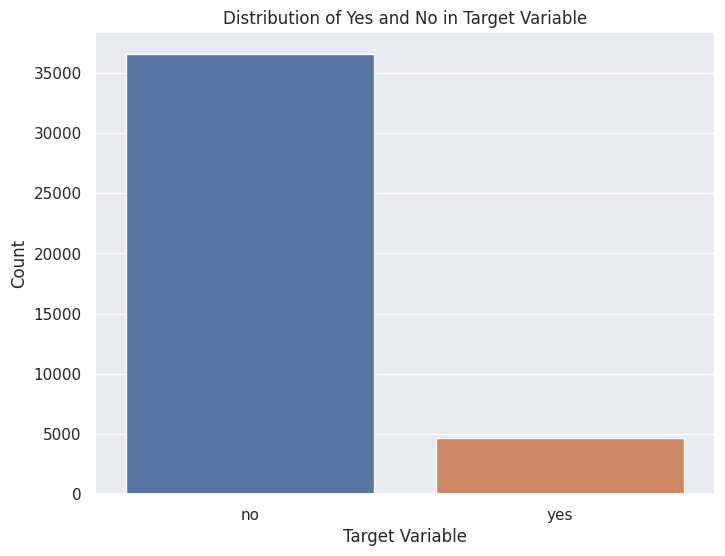

In [36]:
# Assuming your target variable column is named 'target_variable'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)

plt.title('Distribution of Yes and No in Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')

plt.show()


In [37]:

# Select the predictors and target variable
X = data[["duration", "age", "campaign"]]
y = data["y"]


In [38]:

# Convert categorical labels to numerical labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [10]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:

# Apply SMOTE to oversample the "Yes" class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now 'X_resampled' and 'y_resampled' contain the oversampled data


In [41]:

# Build a logistic regression model on the oversampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)



LogisticRegression()

In [42]:
# Make predictions on the training set
train_predictions = model.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, train_predictions)

# Make predictions on the test set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

In [43]:
# Display classification accuracy rates
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.74
Testing Accuracy: 0.79


In [44]:
from sklearn.metrics import classification_report

# Display Classification Report
print('\nClassification Report on Test Set:')
print(classification_report(y_test, test_predictions))



Classification Report on Test Set:
              precision    recall  f1-score   support

          no       0.95      0.80      0.87     10969
         yes       0.30      0.66      0.41      1388

    accuracy                           0.79     12357
   macro avg       0.62      0.73      0.64     12357
weighted avg       0.88      0.79      0.82     12357



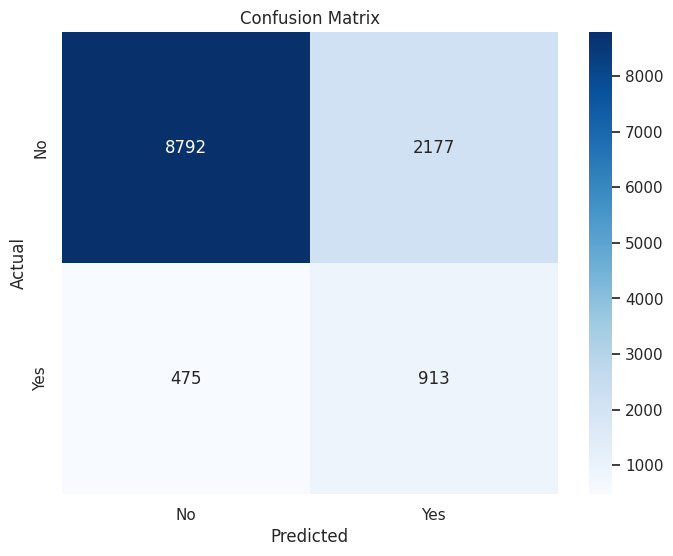

In [45]:
from sklearn.metrics import confusion_matrix

# Display Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The model is able to predict a client who will not subscribe to a term deposit . The model is also able to identify both positive and negative cases with a degree of accuracy 79.